In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# collecting x and y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [6]:
mean_x = np.mean(x)
mean_y = np.mean(y)

n = len(x)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


The value of M is 0.263 and the value of c is 325.57

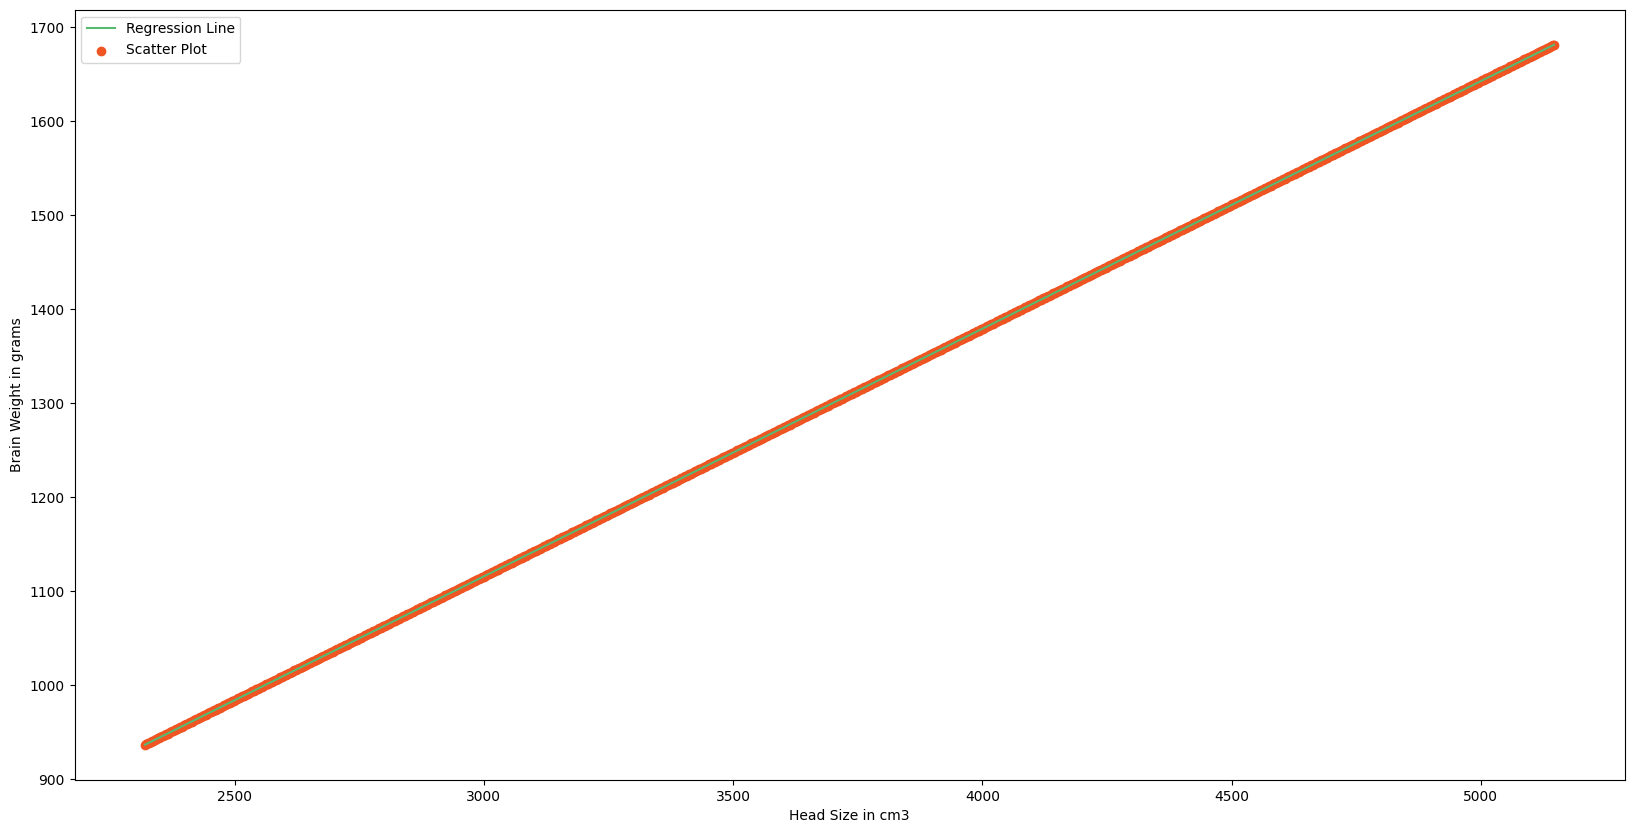

0.0
1.0


In [10]:
# Plotting Values and Regression Line
max_x = np.max(x) + 100
min_x = np.min(x) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * x[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

# Calculating R2 Score
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * x[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

3.414771104713091e-13
1.0


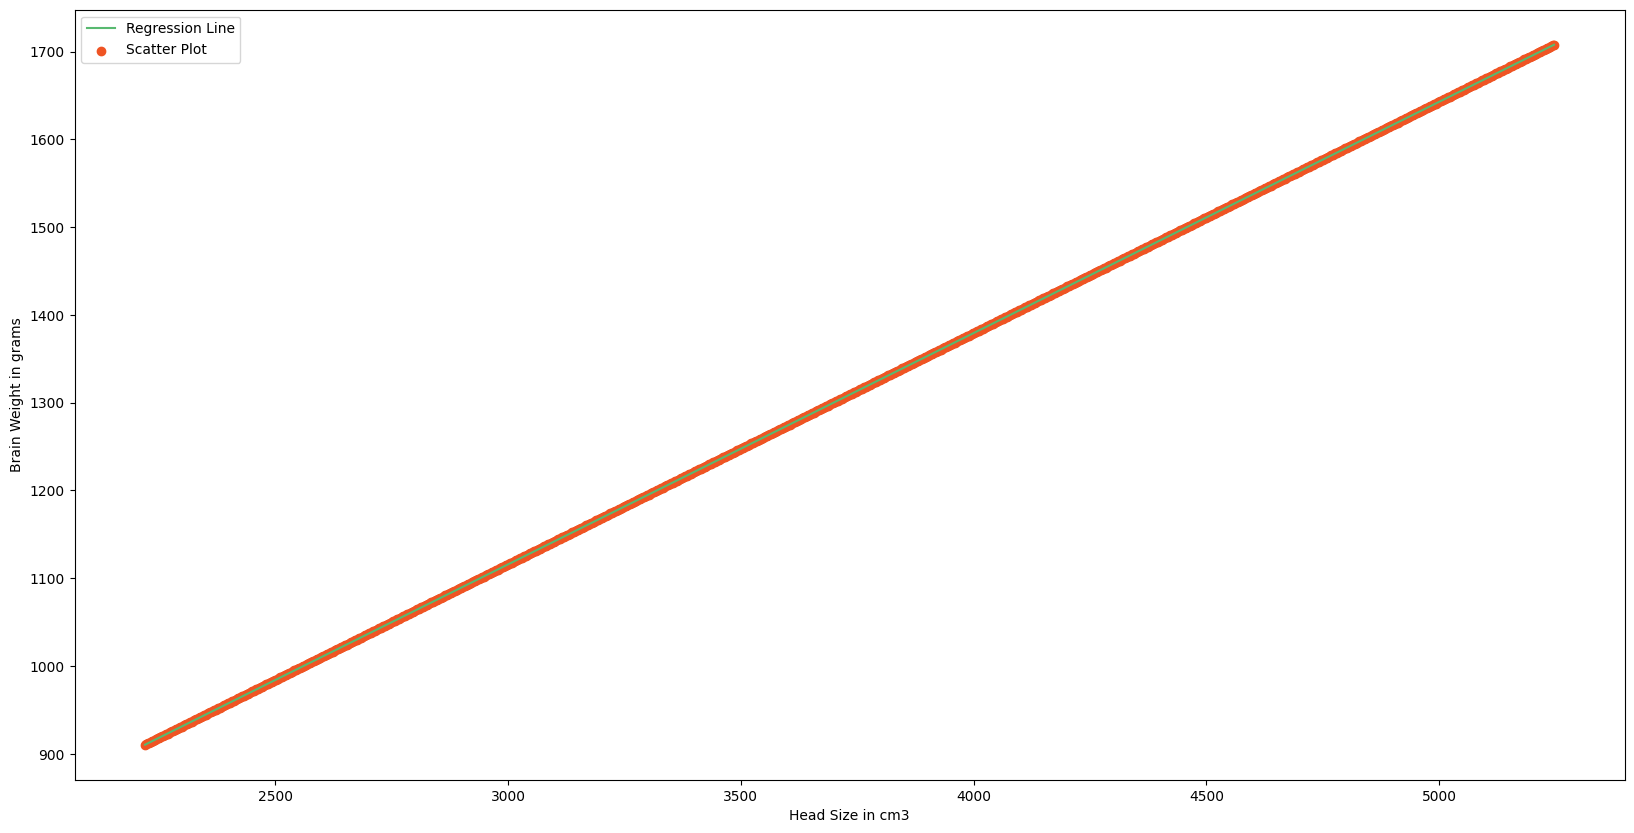

In [12]:
# Using Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
n = len(x)
x = x.reshape((n, 1))

# Creating Model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(x, y)

# Y Prediction
y_pred = reg.predict(x)

# Calculating RMSE and R2 Score
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(x, y)

print(np.sqrt(mse))
print(r2_score)

# Plotting Values and Regression Line
max_x = np.max(x) + 100
min_x = np.min(x) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')

# Ploting Scatter Points
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()
